In [1]:
import sys
sys.path.append('/home/potzschf/repos/')
from helperToolz.helpsters import *
import re

In [2]:
dat = pd.concat([pd.read_csv(file) for file in getFilelist('/data/Aldhani/eoagritwin/et/Training_ML/output/Run_01/', 'csv')], ignore_index=True)
expr = r'(?:np\.float64\()?\s*(-?\d+(?:\.\d+)?)\s*\)?'
preds = [[float(num) for num in re.findall(expr, srow)] for srow in dat['y_pred']]
trues = [[float(num) for num in re.findall(expr, srow)] for srow in dat['y_true']]

In [5]:
dat['r2']

0     0.037468
1     0.067797
2     0.050517
3     0.065127
4     0.044256
5     0.044974
6     0.043371
7     0.036804
8     0.066177
9     0.066126
10    0.034309
11    0.041635
12    0.067363
13    0.044943
14    0.066990
15    0.074420
16    0.041866
17    0.073681
18    0.037775
19    0.041921
20    0.080481
21    0.046246
22    0.047869
23    0.049118
24    0.054078
25    0.036886
26    0.069188
27    0.068046
28    0.050493
29    0.071519
30    0.049261
Name: r2, dtype: float64

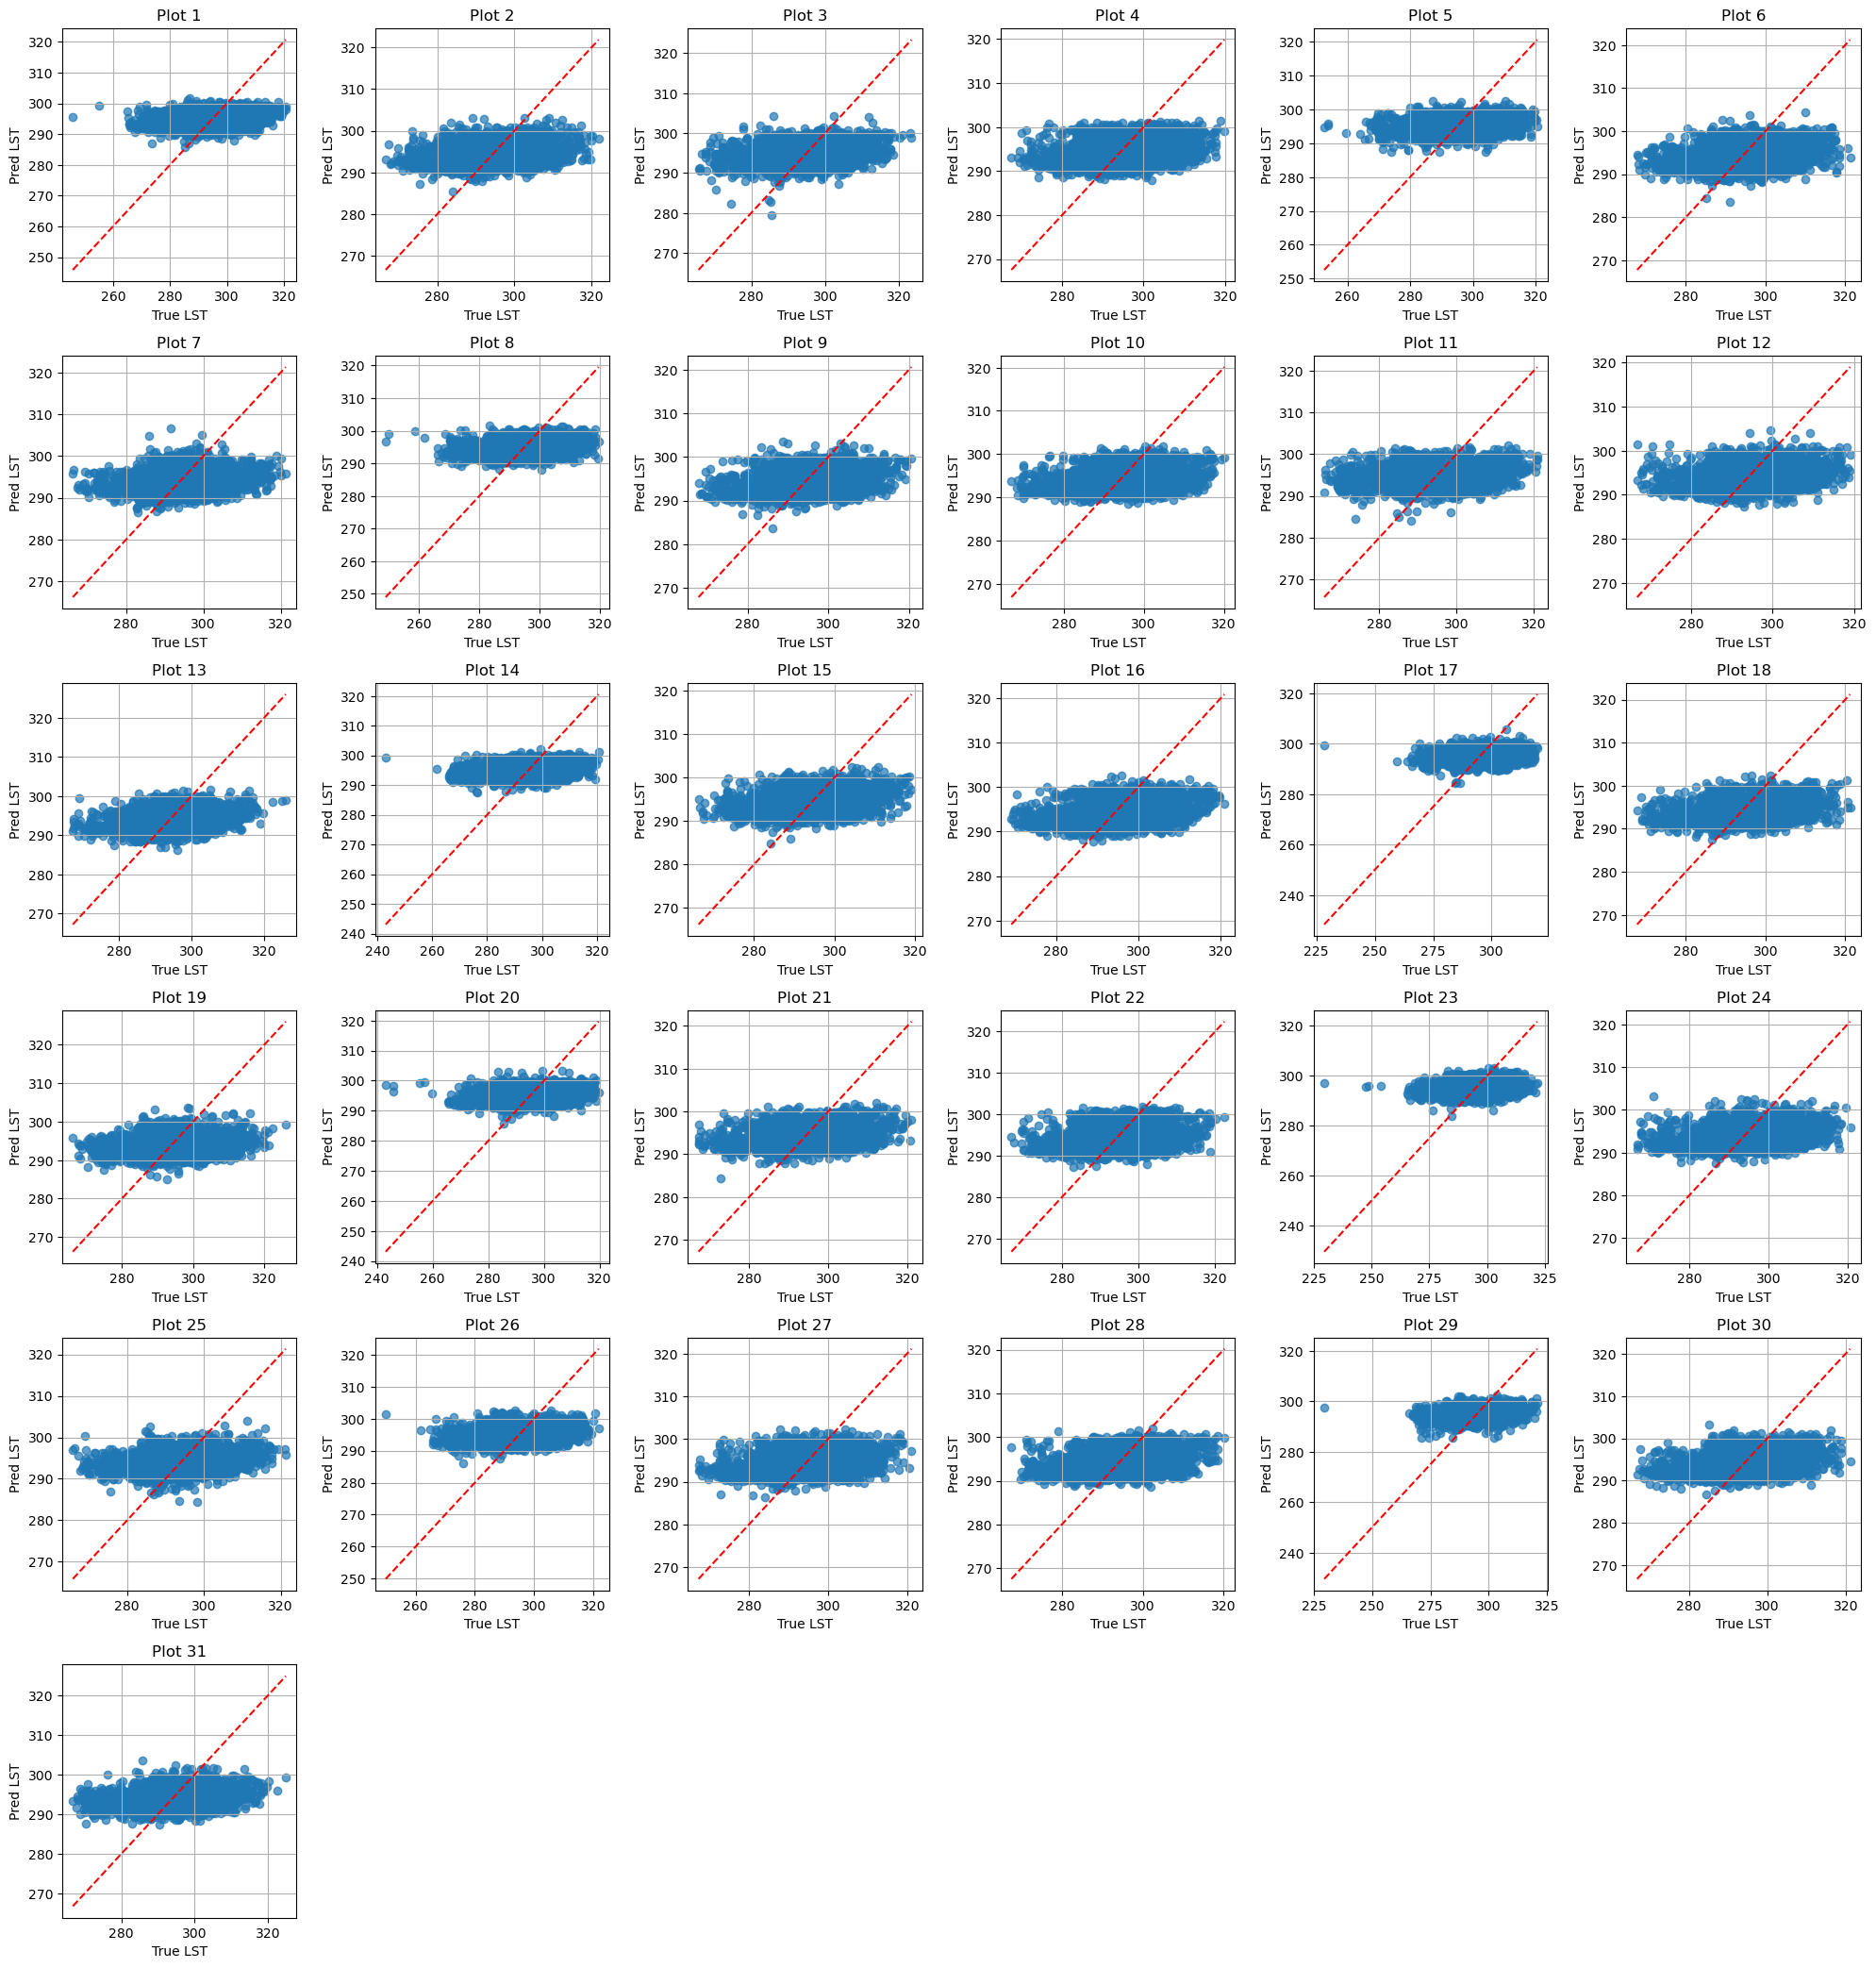

In [4]:
num_plots = len(preds)  # should be 39

# Option 1: Plot all scatterplots in a grid (e.g., 5 rows x 8 cols or so)
rows, cols = 7, 6  # Adjust as needed (7*6=42, slightly more than 39)
fig, axs = plt.subplots(rows, cols, figsize=(20, 24))
axs = axs.flatten()

for i in range(num_plots):
    axs[i].scatter(trues[i], preds[i], alpha=0.7)
    axs[i].set_title(f'Plot {i+1}')
    axs[i].plot([min(trues[i]), max(trues[i])], [min(trues[i]), max(trues[i])], 'r--')  # identity line
    axs[i].set_xlabel('True LST')
    axs[i].set_ylabel('Pred LST')
    axs[i].grid(True)

# Turn off unused subplots if any
for j in range(num_plots, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()
